In [9]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [5]:
# loading the cleaned dataset - saved from feasibility notebook
df = pd.read_csv('clean_spotify.csv')

,Metric,Score
0,Mean Squared Error (MSE),342.446798
1,R-squared (R2),0.306059


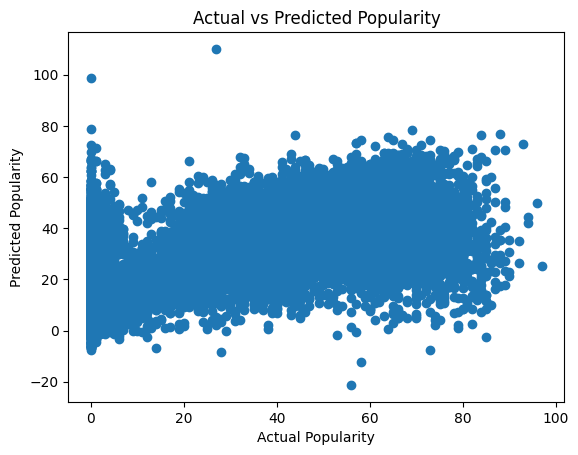

In [8]:
# polynomial regression model - first attempt

# splitting the data into target & features
feature_cols = df.columns.tolist()
feature_cols.remove('popularity')
X = df[feature_cols]
y = df['popularity']

# splitting the data into train / target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature transformation
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# model training
model = LinearRegression()
model.fit(X_train_poly, y_train)

# prediction making
y_pred = model.predict(X_test_poly)

# calculating model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# model evaluation metrics table
evaluation_metrics = {'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                      'Score': [mse, r2]}
metrics_df = pd.DataFrame(evaluation_metrics)
display(metrics_df)

# scatterplot as visualization\
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()

,Metric,Score
0,Mean Squared Error (MSE),365.545957
1,R-squared (R2),0.259250


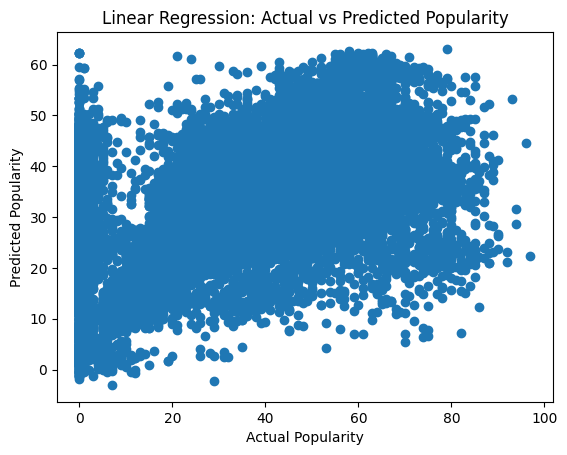

In [10]:
# trying a simple linear regression model - first attempt

# training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# prediction making
y_pred_lr = lr_model.predict(X_test)

# calculating evaulation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# eval metrics table
lr_evaluation_metrics = {'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                      'Score': [mse_lr, r2_lr]}
lr_metrics_df = pd.DataFrame(lr_evaluation_metrics)
display(lr_metrics_df)

# scatterplot for visualization
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Linear Regression: Actual vs Predicted Popularity")
plt.show()

,Metric,Score
0,Mean Squared Error (MSE),442.735265
1,R-squared (R2),0.102832


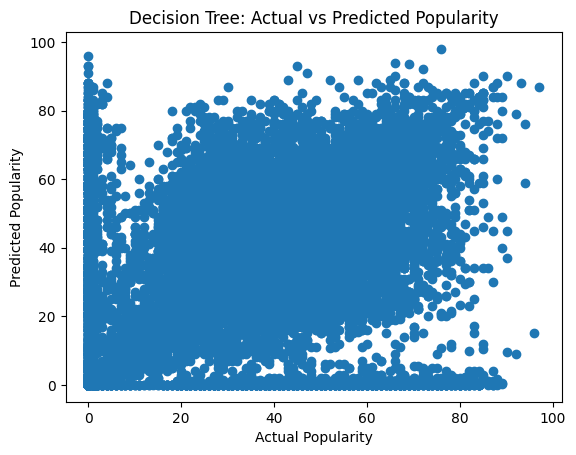

In [11]:
# also trying a decision tree model - first attempt

# model training
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# prediction making
y_pred_dt = dt_model.predict(X_test)

# calculating model eval metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# eval metrics table
dt_evaluation_metrics = {'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2)'],
                      'Score': [mse_dt, r2_dt]}
dt_metrics_df = pd.DataFrame(dt_evaluation_metrics)
display(dt_metrics_df)

# scatterplot for visualization
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Decision Tree: Actual vs Predicted Popularity")
plt.show()